In [77]:
# read csv
import pandas as pd
df = pd.read_csv("r2.csv")
df.head()

,id,filename,pred,TRUE,true2,diff
0,1,jeff_0613-0624_04_ok_0614_0602_580_track_vis.jpg,3,4,4,1
1,2,jeff_0613-0624_04_ok_0614_0617_580_track_vis.jpg,3,3,3,0
2,3,jeff_0613-0624_04_ok_0614_0627_580_track_vis.jpg,3,3,3,0
3,4,jeff_0613-0624_04_ok_0614_0651_580_track_vis.jpg,3,3,3,0
4,5,jeff_0613-0624_04_ok_0614_0851_580_track_vis.jpg,1,1,2,0


In [78]:
y_true = df['TRUE'].tolist()
y_pred = df['pred'].tolist()
print("y_true:", y_true, len(y_true))
print("y_pred:", y_pred, len(y_pred))

y_true: [4, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 3, 4, 1, 2, 2, 2, 2, 1, 1, 7, 7, 7, 1, 1, 1, 10, 8, 7, 7, 9, 9, 1, 1, 6, 6, 6, 6, 6, 6, 3, 4, 3, 3, 3, 4, 5, 5, 4, 6, 6, 5, 4, 2, 2, 2, 2, 6, 5, 5, 4, 3, 1, 2, 2, 4, 4, 3, 5, 5, 9, 9, 8, 8, 8, 8, 6, 6, 5, 3, 7, 8, 5, 5, 2, 2, 1, 2, 1, 1, 3, 1, 1, 1, 4, 4, 2, 15, 13, 13, 15, 11, 11, 8, 4, 7, 6, 5, 2, 1, 1, 2, 3, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 2, 4, 2, 3, 2, 3, 3, 2, 1] 140
y_pred: [3, 3, 3, 3, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 1, 4, 1, 1, 2, 2, 2, 1, 1, 6, 6, 7, 1, 1, 1, 9, 7, 7, 5, 8, 9, 1, 1, 4, 5, 6, 5, 3, 2, 2, 3, 2, 2, 3, 3, 4, 4, 4, 5, 4, 4, 3, 1, 1, 1, 1, 5, 3, 4, 3, 3, 1, 1, 1, 2, 2, 2, 3, 2, 8, 5, 6, 4, 5, 4, 4, 2, 4, 1, 5, 7, 2, 5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 11, 10, 10, 12, 7, 8, 4, 3, 2, 4, 4, 2, 1, 1, 3, 3, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 2, 1] 140


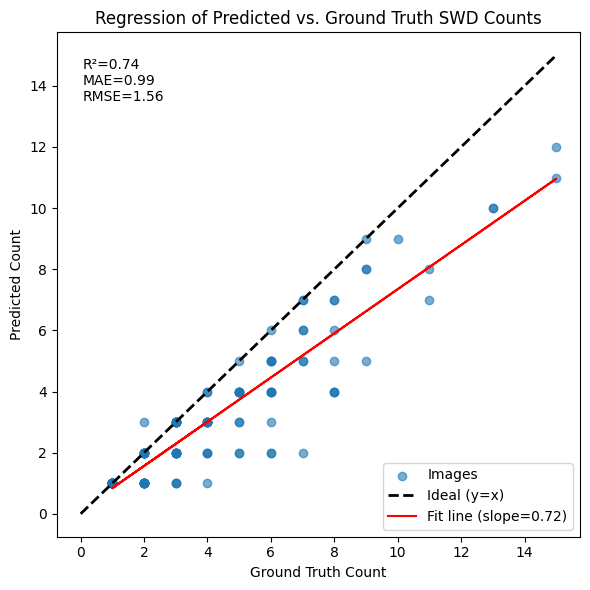

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sympy import root

# # 生成模拟数据
# np.random.seed(42)
# y_true = np.random.randint(0, 30, size=200)  # 真实数量：0-30之间
# y_true = [4,3,3,3,1,3,3,1,1,1,1,1,2,2,1,1,1,3,3,3,
# 3,4,1,2,2,2,2,1,1,7,7,7,1,1,1,10,8,7,7,9,
# 9,1,1,6,6,6,6,6,6,3,4,3,3,3,4,5,5,4,6,6,
# 5,4,2,2,2,2,6,5,5,4,3,1,2,2,4,4,3,5,5,10,
# 8,13,9,9,8,8,8,8,6,6,5,3,7,8,5,5,2,2,1,2,
# 1,1,3
# ]

# # print("y_true:", y_true, len(y_true))

# # 模型预测值 = 真实值 + 一点噪声
# # y_pred = y_true + np.random.normal(loc=0, scale=3, size=200).astype(int)
# y_pred = [3,3,3,3,1,2,2,1,1,1,1,0,1,2,1,1,1,2,3,2,
# 1,4,1,1,2,2,2,1,1,6,6,7,1,1,1,9,7,7,5,8,
# 9,1,1,4,5,6,5,3,2,2,3,2,2,3,3,4,4,4,5,4,
# 4,3,1,1,1,1,5,3,4,3,3,1,1,1,2,2,2,3,2,5,
# 2,8,8,5,6,4,5,4,4,2,4,1,5,7,2,5,1,1,1,2,
# 1,1,1
# ]
# print("y_pred:", y_pred, len(y_pred))
# 构建 DataFrame
df = pd.DataFrame({"y_true": y_true, "y_pred": y_pred})

# 计算指标
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = root(mean_squared_error(y_true, y_pred), 2)

# 绘制散点图 + 回归线 + 理想线
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.6, label="Images")

# 理想线
max_val = max(max(y_true), max(y_pred))
plt.plot([0, max_val], [0, max_val], "k--", lw=2, label="Ideal (y=x)")

# 拟合回归线
coef = np.polyfit(y_true, y_pred, 1)
poly1d_fn = np.poly1d(coef)
plt.plot(y_true, poly1d_fn(y_true), "r-", label=f"Fit line (slope={coef[0]:.2f})")

# 美化
plt.xlabel("Ground Truth Count")
plt.ylabel("Predicted Count")
plt.title("Regression of Predicted vs. Ground Truth SWD Counts")
plt.legend()

# 显示 R², MAE, RMSE
plt.text(0.05, 0.95, f"R²={r2:.2f}\nMAE={mae:.2f}\nRMSE={rmse:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment="top")

plt.tight_layout()
plt.show()


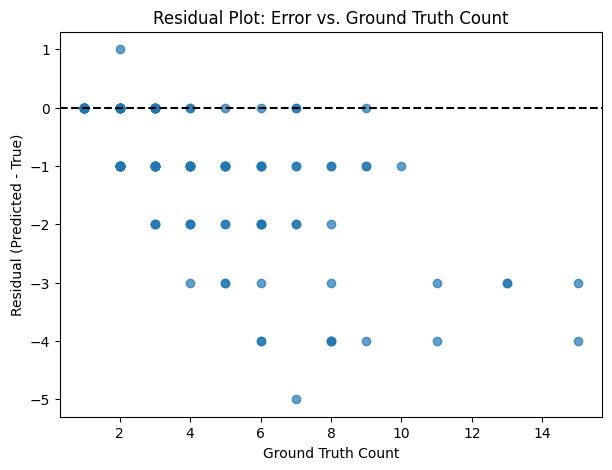

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# 随机生成 ground truth 数据 (0-15之间)
# np.random.seed(42)
# y_true = np.random.randint(0, 16, 50)

# 模拟预测：在低数量时比较准，高数量时有低估
# y_pred = y_true - (0.3 * y_true) + np.random.normal(0, 1, size=y_true.shape)
y_pred = np.clip(y_pred, 0, None)  # 不允许负数

# 残差
residuals = y_pred - y_true

# 画残差图
plt.figure(figsize=(7,5))
plt.scatter(y_true, residuals, alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Ground Truth Count")
plt.ylabel("Residual (Predicted - True)")
plt.title("Residual Plot: Error vs. Ground Truth Count")
plt.show()


/tmp/ipykernel_560201/4013671208.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=bin_labels, y=residuals, order=labels, palette="Set2")


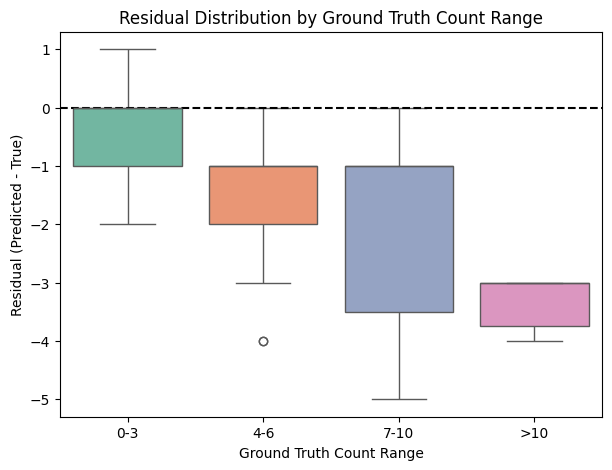

In [81]:
import seaborn as sns

# 定义区间分箱
bins = [0, 3, 6, 10, 20]
labels = ["0-3", "4-6", "7-10", ">10"]
y_true_bins = np.digitize(y_true, bins, right=True)
bin_labels = [labels[i-1] for i in y_true_bins]

# 箱线图
plt.figure(figsize=(7,5))

sns.boxplot(x=bin_labels, y=residuals, order=labels, palette="Set2")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Ground Truth Count Range")
plt.ylabel("Residual (Predicted - True)")
plt.title("Residual Distribution by Ground Truth Count Range")
plt.show()
